In [1]:
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt 

## Representation numerique d’une image grayscale/RGB

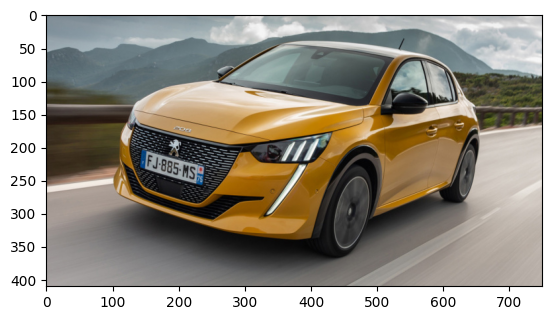

In [2]:
voiture_path = "./Photos/Voiture01.jpg"
voiture = Image.open(voiture_path)
plt.imshow(voiture)

In [3]:
voiture_array = np.asarray(voiture)
red,green,blue=voiture_array[:,:,0],voiture_array[:,:,1],voiture_array[:,:,2]
red,green,blue

(array([[122, 122, 122, ..., 227, 227, 226],
        [123, 123, 123, ..., 218, 217, 216],
        [123, 123, 123, ..., 211, 209, 208],
        ...,
        [170, 169, 169, ..., 186, 185, 185],
        [171, 171, 171, ..., 186, 185, 184],
        [172, 171, 171, ..., 186, 185, 183]], dtype=uint8),
 array([[136, 136, 136, ..., 227, 227, 226],
        [137, 137, 137, ..., 218, 217, 216],
        [137, 137, 137, ..., 211, 209, 208],
        ...,
        [164, 163, 163, ..., 177, 176, 176],
        [165, 165, 165, ..., 177, 176, 175],
        [166, 165, 165, ..., 177, 176, 174]], dtype=uint8),
 array([[147, 147, 145, ..., 225, 225, 224],
        [148, 148, 146, ..., 218, 217, 216],
        [148, 148, 146, ..., 211, 209, 208],
        ...,
        [164, 163, 163, ..., 170, 169, 169],
        [165, 165, 165, ..., 170, 169, 168],
        [166, 165, 165, ..., 170, 169, 167]], dtype=uint8))

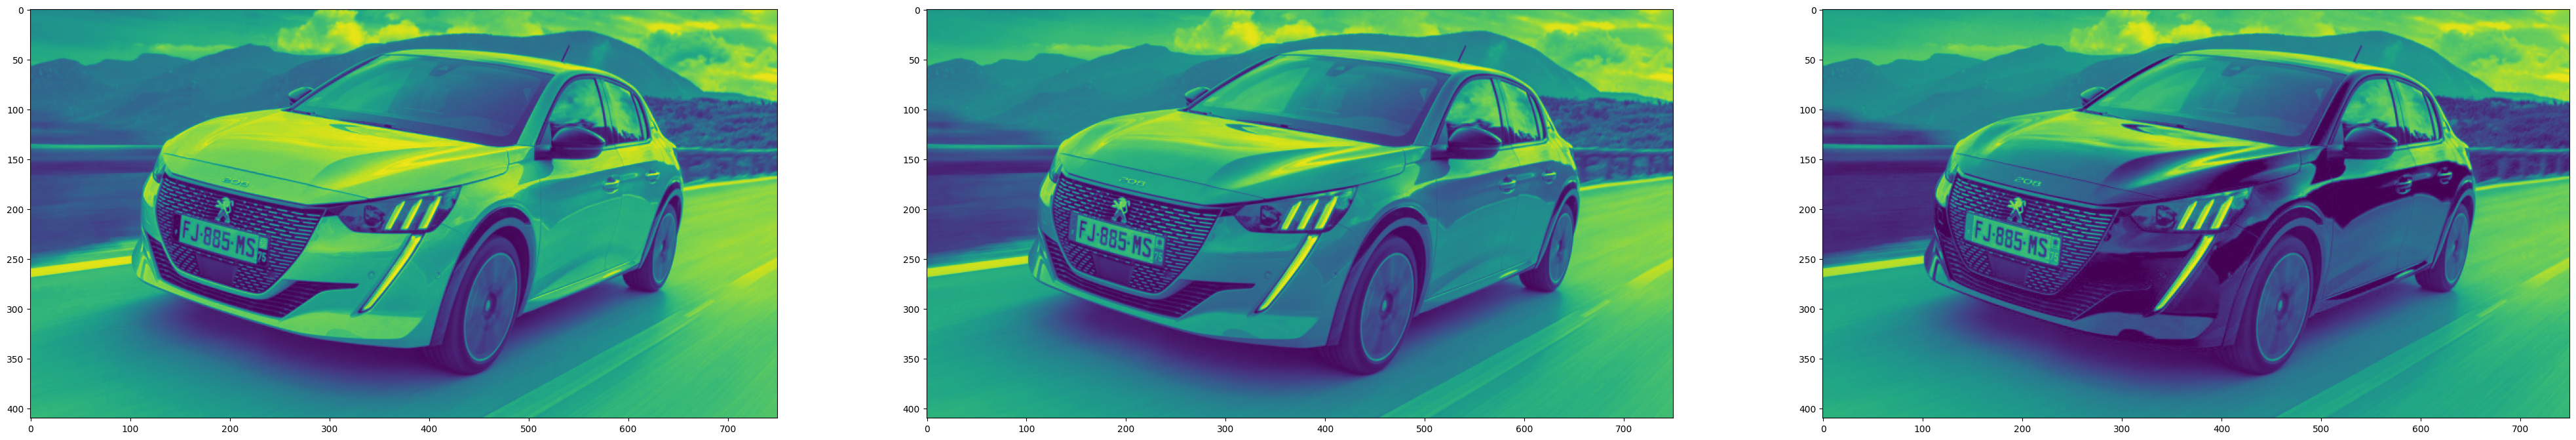

In [4]:
fig, ax =plt.subplots(1,3,figsize = (50,50))
ax[0].imshow(red) # red channel
ax[1].imshow(green) # green channel
ax[2].imshow(blue) # blue channel

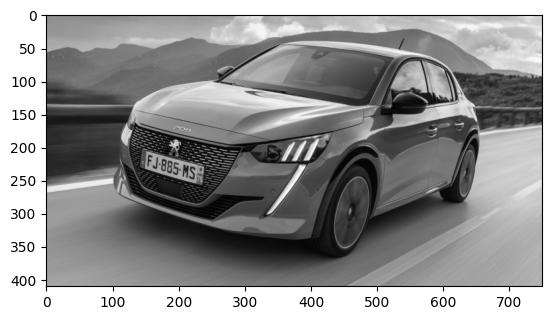

In [5]:
voiture_gray = cv2.cvtColor(voiture_array, cv2.COLOR_BGR2GRAY)
plt.imshow(voiture_gray, cmap = "gray")

## TRANSFORMATION

### SCALING

In [1]:
voiture = cv2.imread(voiture_path)
height, width = voiture.shape[:2]
res = cv2.resize(voiture,(2*width, 2*height), interpolation = cv2.INTER_CUBIC)
plt.imshow(res)

NameError: name 'cv2' is not defined

### Translation

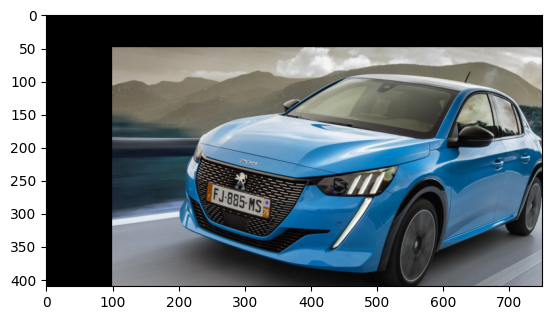

In [7]:
voiture = cv2.imread(voiture_path)
rows,cols,sh = voiture.shape
#Matrice de translation
M = np.float32([[1,0,100],[0,1,50]])
#transformation affine
dst = cv2.warpAffine(voiture,M,(cols,rows))
# cv2.imshow('img',dst)
plt.imshow(dst)

### ROTATION

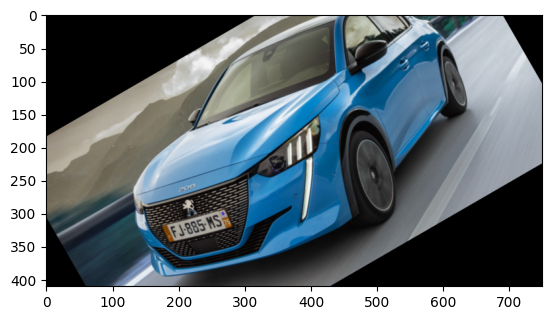

In [8]:
voiture = cv2.imread(voiture_path)
rows,cols,sh = voiture.shape
# cols-1 and rows-1 are the coordinate limits.
M = cv2.getRotationMatrix2D(((cols-1)/2.0,(rows-1)/2.0),30,1)
dst = cv2.warpAffine(voiture,M,(cols,rows))
plt.imshow(dst)

### TRANSFORMATION AFFINE

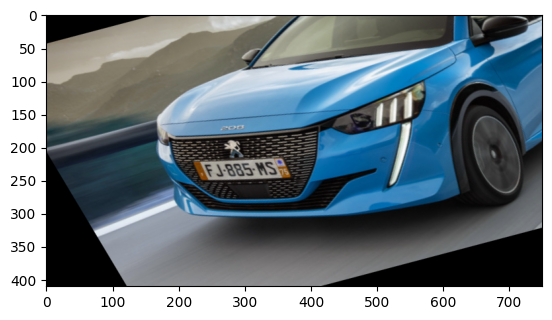

In [9]:
voiture = cv2.imread(voiture_path)
rows,cols,sh = voiture.shape
pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])
M = cv2.getAffineTransform(pts1,pts2)
dst = cv2.warpAffine(voiture,M,(cols,rows))
plt.imshow(dst)

### TRNSFORMATION PERSPECTIVE

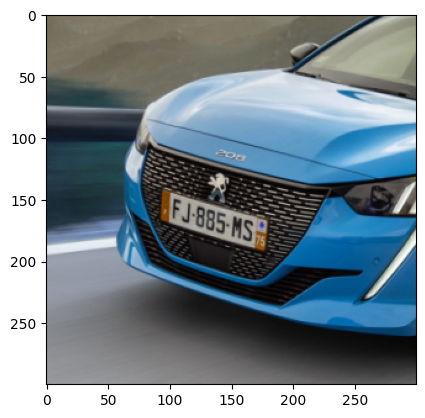

In [10]:
voiture = cv2.imread(voiture_path)
rows,cols,sh = voiture.shape
pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])
M = cv2.getPerspectiveTransform(pts1,pts2)
dst = cv2.warpPerspective(voiture,M,(300,300))
plt.imshow(dst)

## CONVOLUTION / FILTRE

### Image SMOOTHING

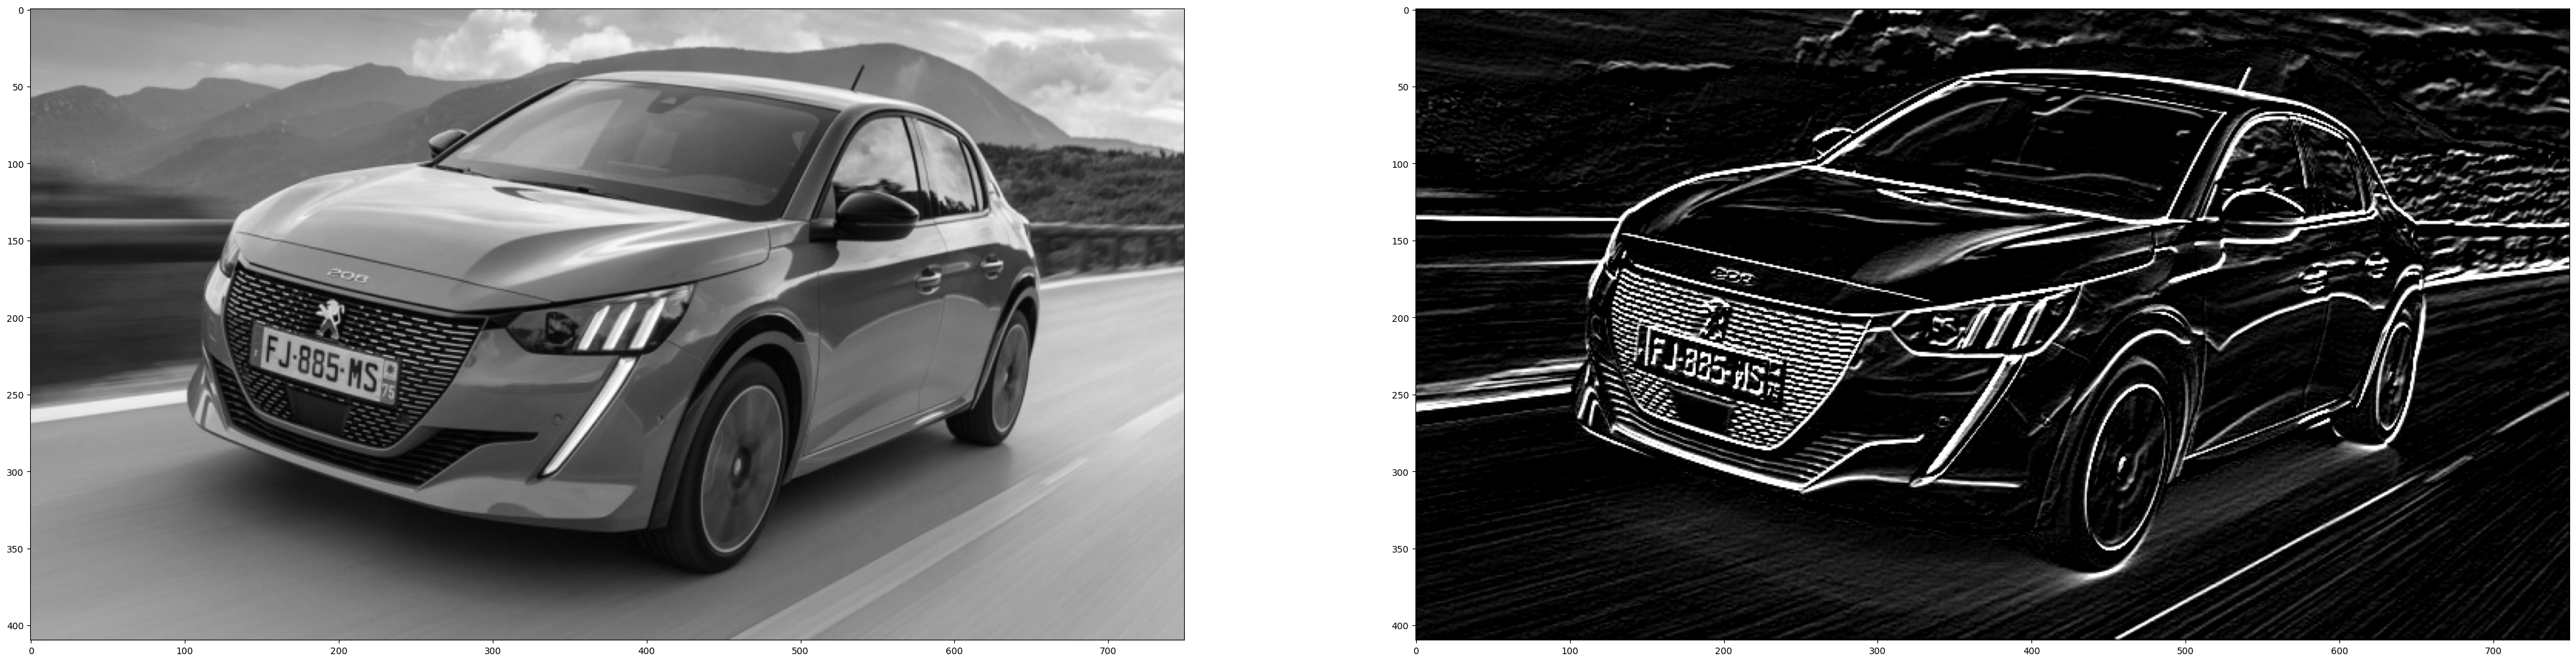

In [11]:
voiture = Image.open(voiture_path)
voiture_arr = np.asarray(voiture)
gray = cv2.cvtColor(voiture_arr, cv2.COLOR_BGR2GRAY)

#Filtre quelconque
kernel = np.array([[-3,-5,-1],[2,0,2],[-1,4,2]])
blurimg = cv2.filter2D(gray,-1,kernel)
fig , ax = plt.subplots(1,2,figsize = (50,50))
ax[0].imshow(gray, cmap='gray')
ax[1].imshow(blurimg, cmap='gray')

### Mean, median et filtre gaussien

###

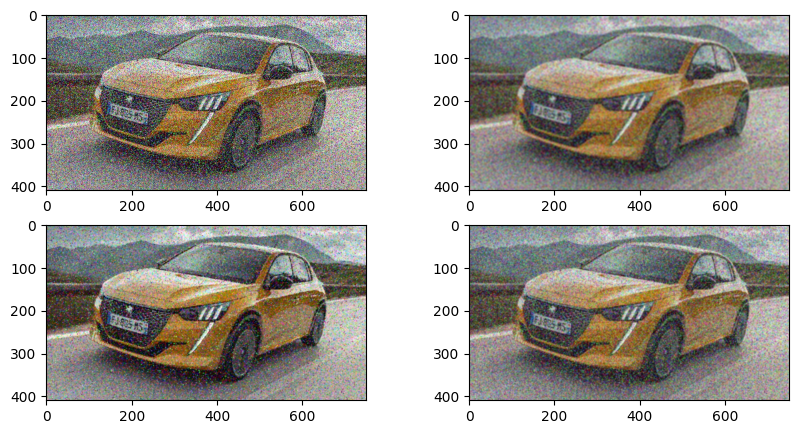

In [17]:
from skimage.util import random_noise
voiture = cv2.imread(voiture_path)
voiture_noise = random_noise(voiture, mode='s&p',amount=0.3)
plt.imsave("./Photos/Voiture2.jpg", voiture_noise)
imgnew = cv2.imread("./Photos/Voiture2.jpg")
meanimg = cv2.blur(imgnew,(5,5))
medianimg = cv2.medianBlur(imgnew,3)
gaussianimg = cv2.GaussianBlur(imgnew,(5,5),0)
fig , ax = plt.subplots(2,2,figsize = (10,5))
ax[0][0].imshow(imgnew, cmap='gray')
ax[0][1].imshow(meanimg, cmap='gray')
ax[1][0].imshow(medianimg, cmap='gray')
ax[1][1].imshow(gaussianimg, cmap='gray')

## DETECTION DE CONTOUR

### Sobel / Canny

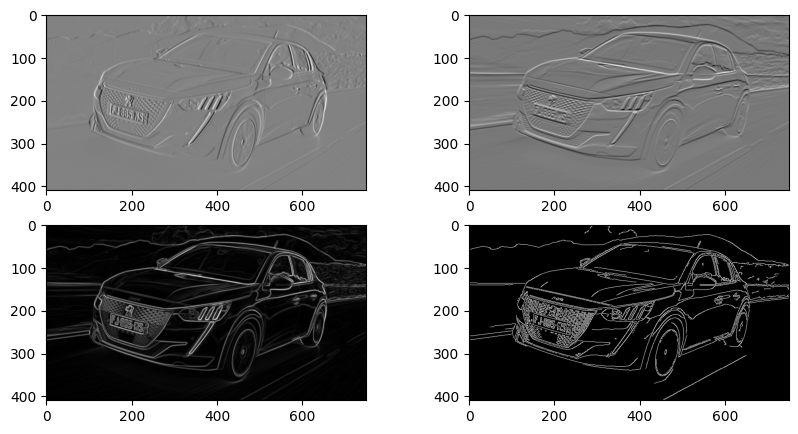

In [19]:
voiture = cv2.imread(voiture_path)
voiture_gray = cv2.cvtColor(voiture,cv2.COLOR_BGR2GRAY)
Sobelx=cv2.Sobel(voiture_gray,cv2.CV_64F,1,0,ksize=5)
Sobely=cv2.Sobel(voiture_gray,cv2.CV_64F,0,1,ksize=5)
mag,direction = cv2.cartToPolar(Sobelx,Sobely,angleInDegrees =True)
sobelG = np.hypot(Sobelx,Sobely)

Canny = cv2.Canny(voiture_gray,100,200)


fig , ax = plt.subplots(2,2,figsize = (10,5))
ax[0][0].imshow(Sobelx, cmap='gray')
ax[0][1].imshow(Sobely, cmap='gray')
ax[1][0].imshow(sobelG, cmap='gray')
ax[1][1].imshow(Canny, cmap='gray')

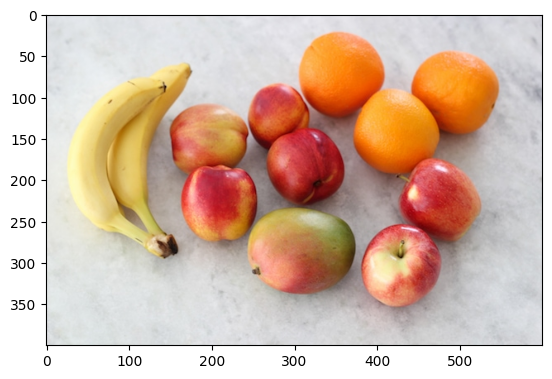

In [24]:
img = Image.open("./Photos/test1.jpg")
plt.imshow(img)
